In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cycler
import re

In [2]:
#Set defualt setting for charts
colors = cycler('color',
               ['#EE6666', '#3388BB', '#9988DD',
                '#EECC55', '#88BB44', '#FFBBBB', '#CECCD2', '#6C757D', '#F7EB2C'])

plt.rcParams.update({
    'axes.facecolor': '#FFFFFF',     
    'axes.edgecolor': 'none',
    'axes.axisbelow': True,
    'axes.grid': True,
    'axes.prop_cycle': colors,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.8,
    'xtick.direction': 'out',
    'xtick.color': '#6C757D',
    'ytick.direction': 'out',
    'ytick.color': '#6C757D',
    'patch.edgecolor': '#E6E6E6',
    'lines.linewidth': 2,
    'font.family': 'Times New Roman',
    'figure.autolayout': True

})

<div style = 'color>

# **1. Tennis Players Frequency**

### Load Data

In [3]:
home_team = pd.read_csv('D:/Trains/tennis_project/data/input/match_home_team_info.csv')

In [4]:
away_team = pd.read_csv('D:/Trains/tennis_project/data/input/match_away_team_info.csv')

### Data Exploring and Cleaning

#### Unify Names Format

In [5]:
#Change all name to lower case, remove extra spaces and replace wrong ponctuations
home_team['full_name'] = home_team['full_name'].str.title()
home_team['full_name'] = home_team['full_name'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
home_team['full_name'] = home_team['full_name'].str.replace(r'\s*\,\s*', ', ', regex= True)

In [6]:
away_team['full_name'] = away_team['full_name'].str.title()
away_team['full_name'] = away_team['full_name'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
away_team['full_name'] = away_team['full_name'].str.replace(r'\s*\,\s*', ', ', regex= True)

In [7]:
home_team.shape

(25610, 19)

##### Edit Mistakes in Full Name column

In [8]:
def insert_comma(full_name):
    if ',' in full_name:
        return full_name
    
    parts = full_name.strip().split()
    n = len(parts)

    if n < 2:
        return full_name
    if n % 2 == 0:
        idx = n // 2
    else:
        idx = n- 1
    
    first_part = ' '.join(parts[:idx])
    second_part= ' '.join(parts[idx: ])
    return f'{first_part}, {second_part}'

In [9]:
#Home team
home_team.insert(loc = 18, column = 'fix_full_name', value = home_team['full_name'].apply(insert_comma))
home_team['fix_full_name'] = home_team['fix_full_name'].str.replace(r'\s*\,\s*', ', ', regex= True)

In [10]:
#Away team
away_team.insert(loc = 18, column = 'fix_full_name', value = away_team['full_name'].apply(insert_comma))
away_team['fix_full_name'] = away_team['fix_full_name'].str.replace(r'\s*\,\s*', ', ', regex= True)

In [11]:
home_team['fix_full_name'] = np.where((home_team['fix_full_name'] == 'Sun'), 'Sun ,L.', home_team['fix_full_name']) 
away_team['fix_full_name'] = np.where((away_team['fix_full_name'] == 'Sun'), 'Sun ,L.', away_team['fix_full_name']) 

In [12]:
away_team.insert(loc = 19, column = 'player_type', value = 'away')
home_team.insert(loc = 19, column = 'player_type', value = 'home')

##### Find and Drop Fully Duplicated Rows

In [13]:
#For home team
home_compare_cols = [col for col in home_team.columns if col != 'date']
duplicated_rows = home_team.duplicated(subset = home_compare_cols, keep = False)
home_team_sort = home_team.sort_values('match_id')
home_team = home_team_sort.drop_duplicates(subset= home_compare_cols, keep= 'last')        

In [14]:
#For away team
away_compare_cols = [col for col in home_team.columns if col != 'date']
duplicated_rows = away_team.duplicated(subset = away_compare_cols, keep = False)
away_team = away_team.drop_duplicates(subset= away_compare_cols, keep= 'last') 

##### Find and Drop Fully Null Rows

In [15]:
#For home team
null_compare_cols = [col for col in home_team.columns if col not in ['match_id', 'data']]
home_team[home_team[null_compare_cols].isnull().all(axis=1)]    #There is no fully null row in home team

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,...,current_prize,total_prize,player_id,current_rank,name_code,country,full_name,fix_full_name,player_type,date


In [16]:
#For away team
null_compare_cols = [col for col in away_team.columns if col not in ['match_id', 'data']]
away_team[away_team[null_compare_cols].isnull().all(axis=1)]    #There is no fully null row in away team

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,...,current_prize,total_prize,player_id,current_rank,name_code,country,full_name,fix_full_name,player_type,date


##### Find and Drop Fully Null Columns

In [17]:
#For home team
home_team.isnull().all(axis = 0)   #There is no fully null column in home team

match_id         False
name             False
slug             False
gender           False
user_count       False
residence        False
birthplace       False
height           False
weight           False
plays            False
turned_pro       False
current_prize    False
total_prize      False
player_id        False
current_rank     False
name_code        False
country          False
full_name        False
fix_full_name    False
player_type      False
date             False
dtype: bool

In [18]:
#For away team
away_team.isnull().all(axis = 0)   #There is no fully null column in away team

match_id         False
name             False
slug             False
gender           False
user_count       False
residence        False
birthplace       False
height           False
weight           False
plays            False
turned_pro       False
current_prize    False
total_prize      False
player_id        False
current_rank     False
name_code        False
country          False
full_name        False
fix_full_name    False
player_type      False
date             False
dtype: bool

##### Find and Fill Null Names

In [19]:
#For away team
away_team['fix_full_name'].isnull().sum()   #There is no null value in away team names

np.int64(0)

In [20]:
#For home team
home_team['fix_full_name'].isnull().sum()   #There is no null value in home team names

np.int64(0)

#### Counting Players 

In [21]:
#For home team
group_home_names = home_team.groupby('fix_full_name', as_index= False).agg(count = ('fix_full_name', 'count')).sort_values('count', ascending= False)
group_home_names.iloc[0:10]

,fix_full_name,count
1895,"Sakellaridi, Sapfo",36
1632,"Parizzia, Nicolas",35
986,"Jianu, Filip Cristian",34
13,"Aguilar Cardozo, Joaquin",28
790,"Gonzalez Fernandez, Mario",26
1296,"Makhlouf, Mohamed Nazim",26
248,"Bosio, Gabriele",26
526,"Dellien Velasco, Murkel Alejandro",25
149,"Basilashvili, Nikoloz",25
1982,"Shapatava, Sofia",25


In [22]:
#For away team
group_away_names = away_team.groupby('fix_full_name', as_index= False).agg(count = ('fix_full_name', 'count')).sort_values('count', ascending= False)
group_away_names.iloc[0:10]

,fix_full_name,count
1738,"Popko, Dmitry",39
880,"Hoang, Antoine",27
2243,"Ursu, Vadym",27
1827,"Ribero, Franco",26
438,"Collins, Danielle",26
535,"Demidova, Diana",25
1248,"Loge, Jack",24
428,"Clarke, Jay",24
939,"Imamura, Saki",24
1916,"Sakellaridis, Stefanos",24


#### Identify Mistake in Player Names

In [23]:
#Find names which are same but write in two ways
player_counts = home_team.groupby('player_id')['fix_full_name'].nunique()

multi_player_matches = player_counts[player_counts > 1]
multi_player_matches

player_id
82133     2
198197    2
254227    2
353488    2
Name: fix_full_name, dtype: int64

In [24]:
#Edit names
name_corrections = {
    82133: 'Dellien Velasco, Murkel Alejandro',
    198197: 'Arango, Emiliana',   
    254227: 'Yunchaokete, Bu',
    353488: 'Geerlings Martinez, Ariana'
}

home_team.loc[:, 'fix_full_name'] = home_team.apply(lambda row: name_corrections.get(row['player_id'], row['fix_full_name']),axis=1)

In [25]:
#Find names which are same but write in two ways
player_counts = away_team.groupby('player_id')['fix_full_name'].nunique()

multi_player_matches = player_counts[player_counts > 1]          
multi_player_matches

player_id
82133     2
168420    2
196922    2
391794    2
Name: fix_full_name, dtype: int64

In [26]:
#Edit names
name_corrections = {
    82133: 'Dellien Velasco, Murkel Alejandro',
    168420: 'Andrade, Andres',   
    196922: 'Sanchez Jover, Carlos',
    391794: 'Schiessl, Joao Eduardo'
}

away_team.loc[:, 'fix_full_name'] = away_team.apply(lambda row: name_corrections.get(row['player_id'], row['fix_full_name']),axis=1)

#### Unique Players 

In [27]:
#Concat home and away dataframes to find number of players in this dataset
concat_all_players = pd.concat([away_team, home_team], ignore_index= True, axis = 0)
# concat_all_players.to_csv('D:/Trains/tennis_project/data/output/concat_away_home_team.csv')

In [28]:
(concat_all_players.groupby('fix_full_name', as_index= False)
 .agg(count_matches = ('fix_full_name', 'count'))
 .sort_values('count_matches', ascending= False))

,fix_full_name,count_matches
1851,"Popko, Dmitry",50
1509,"Merida Aguilar, Daniel",41
417,"Chidekh, Clement",41
703,"Ferrari, Francesco",41
449,"Clarke, Jay",41
...,...,...
5,"Adaloglou, Magdalini",1
155,"Basel, Valentin",1
18,"Ahn, Alyssa",1
2607,"Zheng, Saisai",1


In [29]:
#Count players group by gender
unique_players = concat_all_players[['fix_full_name', 'gender']].drop_duplicates()
unique_players.groupby(['gender']).agg(count_gender = ('gender', 'count'))

,count_gender
gender,
F,1234
M,1404


In [30]:
#Create list of home / away players
home_players_list = [name for name in home_team['fix_full_name'].unique()] 
away_players_list = [name for name in away_team['fix_full_name'].unique()]    

In [31]:
#Number of players as both home and away type 
common_players = set(home_players_list) & set(away_players_list)
len(common_players)

2282

In [32]:
#Number of players just as home type
only_homes = set(home_players_list) - set(away_players_list)
len(only_homes)

165

In [33]:
#Number of players just as away type
only_awayes = set(away_players_list) - set(home_players_list)
len(only_awayes)

197

|       Metric      |  Count |
|-------------------|--------|
| Total players     |  2648  |
| Female players    |  1234  |
| Male players      |  1404  |
| Play as home side |  165   |
| Play as away side |  201   |
| Play as both sides|  2282  |

______________________

# **2. Height of Players**

#### Load Data

In [34]:
home_needed_cols = home_team[['match_id', 'gender', 'height', 'country', 'fix_full_name', 'player_type']]
away_needed_cols = away_team[['match_id', 'gender', 'height', 'country', 'fix_full_name', 'player_type']]
height_concat = pd.concat([home_needed_cols, away_needed_cols], ignore_index= True, axis = 0)
# height_concat.to_csv('D:/Trains/tennis_project/data/output/concat_height.csv')

In [35]:
height_concat['height'].describe()

count    19613.000000
mean         1.823117
std          0.078820
min          1.570000
25%          1.780000
50%          1.830000
75%          1.880000
max          2.080000
Name: height, dtype: float64

#### Fix Some Wrong Heights

In [36]:
#Edit heights where there is more than one height recorded for every player
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Andreev, Adrian'), 1.8, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Bellucci, Mattia'), 1.75, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Bigun, Kaylan'), 1.83, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Campana Lee, Gerard'), 1.83, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Cerundolo, Juan Manuel'), 1.83, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Damas, Miguel'), 2.08, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Jarry, Nicolas'), 2.01, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Kumar, Omni'), 1.73, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Rodriguez, Lorenzo Joaquin'), 1.96, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Slump, Stijn'), 1.88, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Smith, Keegan'), 2.01, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Tabacco, Giorgio'), 2.03, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Tu, Li'), 1.83, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Vavassori, Andrea'), 1.93, height_concat['height'])
height_concat['height'] = np.where((height_concat['fix_full_name'] == 'Zanellato, Nicolas'), 1.68, height_concat['height'])

#### Find and Fill Null Heights

In [37]:
height_concat['height'].isnull().sum()

np.int64(15168)

In [38]:
#Statistics on Heights column
mean = height_concat['height'].mean()
min = height_concat['height'].min()
max = height_concat['height'].max()
median = height_concat['height'].median()
mode = height_concat['height'].mode()

print(f'average height is: {mean}')
print(f'min height is    : {min}')
print(f'max height is    : {max}')
print(f'median height is : {median}')
print(f'mode height is   : {mode}')

average height is: 1.8234069239789934
min height is    : 1.57
max height is    : 2.08
median height is : 1.83
mode height is   : 0    1.83
Name: height, dtype: float64


In [39]:
#Calculate average height base on country and gender
groupby_heigh = (height_concat.groupby(['country', 'gender'], as_index=False)['height']
                                        .agg('mean')
                                        .rename(columns={'height': 'group_avg_height'})
                                        .sort_values('group_avg_height', ascending = False))
groupby_heigh.head(5)

,country,gender,group_avg_height
173,Zimbabwe,M,1.966364
141,Slovenia,M,1.958571
96,Luxembourg,M,1.933704
3,Antigua and Barbuda,M,1.930000
75,Ireland,M,1.930000


In [40]:
#Calculate average height base on country 
country_avg = (height_concat.groupby('country', as_index=False)['height']
               .agg('mean')
               .rename(columns={'height': 'country_avg_height'})
               .sort_values('country_avg_height', ascending = False))
country_avg.head(5)

,country,country_avg_height
100,Zimbabwe,1.966364
56,Luxembourg,1.933704
2,Antigua and Barbuda,1.930000
42,Ireland,1.930000
28,El Salvador,1.930000


In [41]:
groupby_heigh = groupby_heigh.merge(country_avg, on='country', how='left')

In [42]:
groupby_heigh['group_avg_height'] = groupby_heigh['group_avg_height'].fillna(groupby_heigh['country_avg_height'])

In [43]:
height_concat = height_concat.merge(groupby_heigh, on = ['country', 'gender'], how = 'left')

In [44]:
#1. Fill missing heights using average height of country and gender
height_concat.loc[height_concat['height'].isna(), 'height'] = height_concat.loc[height_concat['height'].isna(), 'group_avg_height']

In [45]:
#2. Fill missing heights using overall country average height when gender-specific data was unavailable
height_concat.loc[height_concat['height'].isna(), 'height'] = height_concat.loc[height_concat['height'].isna(), 'country_avg_height']

In [46]:
#3. Fill remaining missing heights using global mean height
height_concat.loc[height_concat['height'].isna(), 'height'] = height_concat['height'].fillna(height_concat['height'].mean())

In [47]:
height_concat[height_concat['height'].isnull()]  #All null heights are fill now

,match_id,gender,height,country,fix_full_name,player_type,group_avg_height,country_avg_height


In [48]:
#Drop extra columns and duplicate rows
height_concat = height_concat.drop(columns= ['group_avg_height', 'country_avg_height'])
height_concat = height_concat.drop_duplicates(keep= 'last')

#### Average Height of Players Calculation

In [49]:
#Total average of height
avg_height_players = height_concat['height'].mean().round(2)
avg_height_players

np.float64(1.8)

In [50]:
#Average height base on gender
groupby_gender_avg_height = height_concat.groupby('gender', as_index= False).agg(avg_height = ('height', 'mean')).round(2)
overall_rows = pd.DataFrame({'gender': ['Total players'], 'avg_height': [avg_height_players]})
total_avg_height = pd.concat([groupby_gender_avg_height, overall_rows], ignore_index= True)
total_avg_height

,gender,avg_height
0,F,1.74
1,M,1.84
2,Total players,1.80


In [51]:
#Identification of 10 tallest players
tallest_players = (height_concat.groupby(['fix_full_name', 'country', 'gender'], as_index= False)
                                    .agg(height = ('height', 'max'))
                                    .sort_values('height', ascending= False)).head(10)
tallest_players

,fix_full_name,country,gender,height
512,"Damas, Miguel",Spain,M,2.08
2501,"Watt, James",New Zealand,M,2.06
69,"Angele, Jaimee Floyd",France,M,2.06
2289,"Tabacco, Giorgio",Italy,M,2.03
513,"Damm Jr, Martin",USA,M,2.03
600,"Dominko, Sebastian",Slovenia,M,2.03
541,"De Schepper, Kenny",France,M,2.03
1695,"Olivetti, Albano",France,M,2.03
1593,"Mpetshi Perricard, Giovanni",France,M,2.03
580,"Diallo, Gabriel",Canada,M,2.03


In [52]:
# height_concat.to_csv('D:/Trains/tennis_project/data/output/height_info.csv', index= False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_329100\1051750912.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male', 'Total Players'])


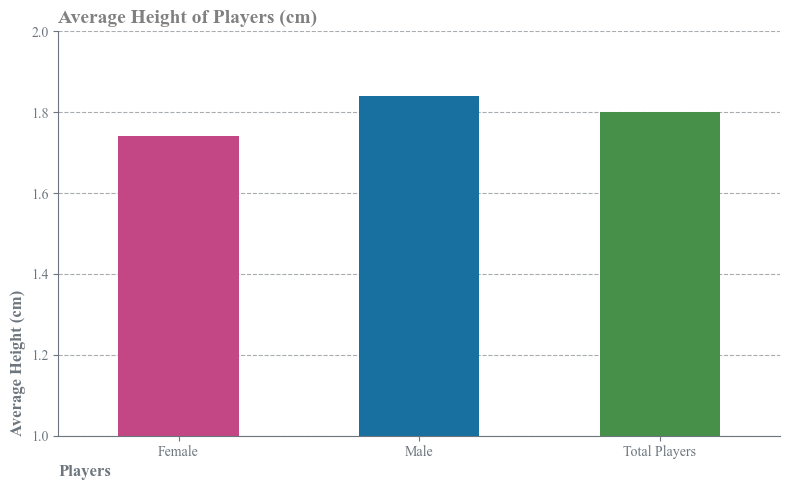

In [53]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.barplot(data = total_avg_height, x = 'gender', y = 'avg_height', palette= {'Total players': '#3B9C3F', 'M':'#0077B6', 'F':'#D63384'}, width= 0.5, hue ='gender')
ax.set_title('Average Height of Players (cm)', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax.set_xlabel('Players', loc='left', color='#6C757D', weight = 'bold', fontsize = 12)
ax.set_ylabel('Average Height (cm)', loc='bottom', color='#6C757D', weight = 'bold', fontsize = 12)
ax.tick_params(axis = 'both', color = '#6C757D')
ax.set_xticklabels(['Female', 'Male', 'Total Players'])
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#6C757D')
ax.grid(axis= 'y', linestyle = '--', color = '#6C757D', alpha = 0.6)
ax.set_ylim(0, 2.0)
ax.set_ybound(1);


In [54]:
unique_players = height_concat.drop_duplicates(subset=['fix_full_name'], keep = 'last')
data_for_histogram = unique_players.groupby('height', as_index= False).agg(count = ('height', 'count')) 

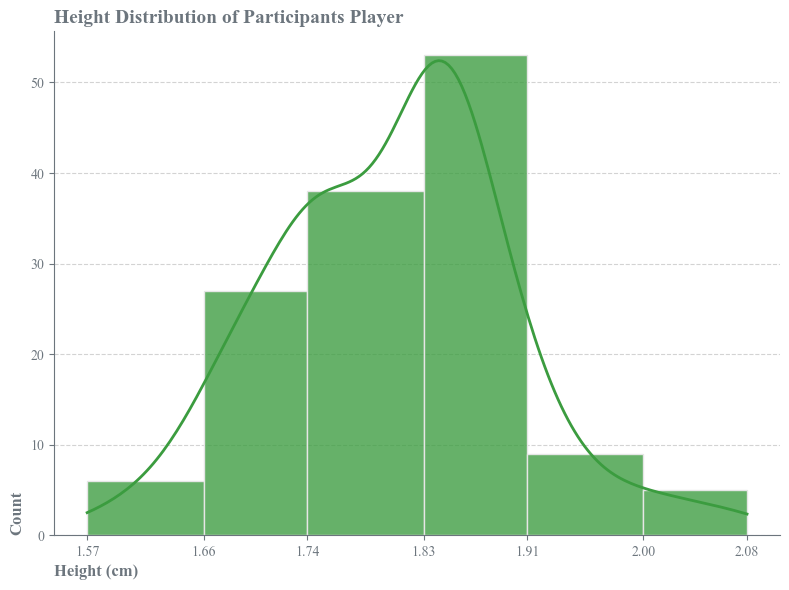

In [55]:
bins = np.histogram_bin_edges(data_for_histogram['height'], bins=6).round(2)    #Bins with intervals of about 10

fig, ax = plt.subplots(figsize= (8, 6))
sns.histplot(data = data_for_histogram, x = 'height',bins = bins, color= '#3B9C3F', alpha = 0.78, kde= True)

ax.set_title('Height Distribution of Participants Player', color = '#6C757D', weight = 'bold', loc = 'left', fontsize = 14)
ax.set_xlabel('Height (cm)', color = '#6C757D', weight = 'bold', loc = 'left', fontsize = 12)
ax.set_ylabel('Count', color = '#6C757D', weight = 'bold', loc = 'bottom', fontsize = 12)
ax.set_xticks((bins))
ax.grid(axis= 'x',visible= False)
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('#6C757D')
# plt.savefig('D:/Trains/tennis_project/chart/height_hist.jpeg', dpi = 300);


average height of total players beside gender, is equal to **1.80**. This players female average height is about 1.74 and male are 1.84 (cm) so men are taller than women.
Also there are players **above 2.00** and most of them are from France. 
Base on player's nationality, **Zimbabwe** with just 2 players, **Luxembourg** with players	4 and **Antigua and Barbuda** with 1 players have top average heights (above 1.93 cm) in this tennis tournaments. As the number of players from a country increase, a decline in their average height is to be expected. 
 **East asian Countries** height are the lowest and their average height is about **1.75 cm**.

________________________

# **3. Highest Number of Wins**

#### Load Data

In [56]:
event_df = pd.read_csv('D:/Trains/tennis_project/data/input/match_event_info.csv')

#### Drop Duplicated Rows

In [57]:
cols = [col for col in event_df.columns if col != 'date']
event_df = event_df[event_df.duplicated(subset= cols, keep= 'last')]

#### Merge Winner Data and Team Datasets to Find Player Name

In [58]:
home_away_team = pd.concat([home_team, away_team], ignore_index= True, axis = 0)

In [59]:
event_df = event_df.merge(home_away_team, on = 'match_id', how = 'outer')

#### Calculate Number of wins per Players

In [60]:
event_df['is_winner'] = np.where(((event_df['player_type'] == 'home') & (event_df['winner_code'] == 1)) |
                                ((event_df['player_type'] == 'away') & (event_df['winner_code'] == 2)),
                                    1,
                                    0)

In [61]:
event_df = event_df[['match_id', 'fix_full_name', 'winner_code', 'is_winner', 'player_type']]
event_df = event_df.drop_duplicates(keep= 'first')

In [62]:
winning_count = (event_df.groupby('fix_full_name', as_index= False)
                 .agg(number_of_wins = ('is_winner', 'sum'))
                 .sort_values('number_of_wins', ascending = False))
most_winners = winning_count.head(4)
most_winners

,fix_full_name,number_of_wins
1851,"Popko, Dmitry",26
784,"Gengel, Marek",20
417,"Chidekh, Clement",19
1249,"Kužmová, Katarína",19


In [63]:
players_total_data = (winning_count.merge(home_away_team[['fix_full_name', 'gender', 'country', 'current_rank']], on = 'fix_full_name', how = 'left')
                      .sort_values(['number_of_wins', 'current_rank'], ascending = False))

In [64]:
cols = [col for col in players_total_data.columns if col != 'current_rank']
players_total_data = players_total_data.sort_values('current_rank')
players_total_data = players_total_data.drop_duplicates(subset= cols, keep= 'first')
players_total_data.sort_values('number_of_wins', ascending= False).head(5)

,fix_full_name,number_of_wins,gender,country,current_rank
35,"Popko, Dmitry",26,M,Kazakhstan,223.0
72,"Gengel, Marek",20,M,Czech Republic,556.0
156,"Kužmová, Katarína",19,F,Slovakia,429.0
104,"Chidekh, Clement",19,M,France,280.0
260,"Clarke, Jay",18,M,United Kingdom,317.0


In [65]:
# players_total_data.to_csv('D:/Trains/tennis_project/data/output/winner_info.csv', index= False)

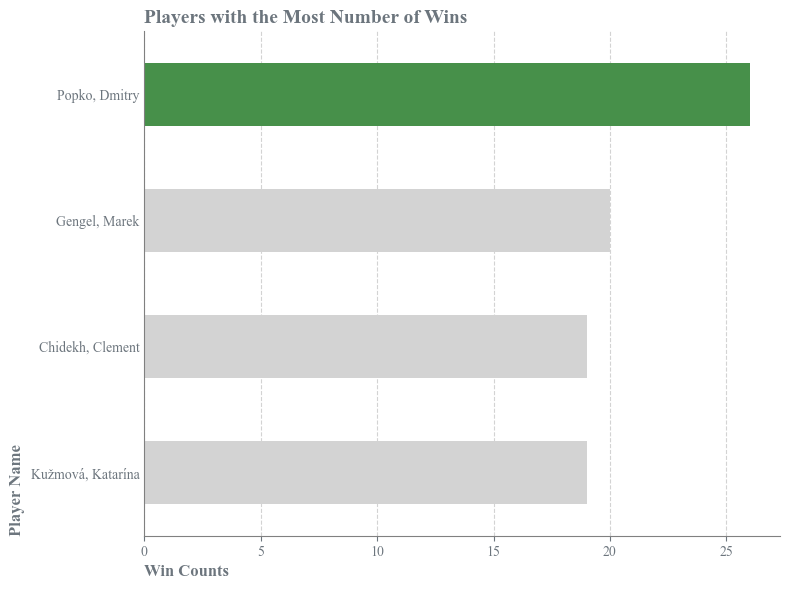

In [66]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = most_winners,
            y = 'fix_full_name',
            x = 'number_of_wins',
            width = 0.5,
            hue = 'fix_full_name',
            palette = ['#3B9C3F','lightgray', 'lightgray', 'lightgray'])

ax.set_title('Players with the Most Number of Wins', loc = 'left', color = '#6C757D', weight = 'bold', fontsize = 14)
ax.set_xlabel('Win Counts', loc='left', color='#6C757D', weight = 'bold', fontsize = 12)
ax.set_ylabel('Player Name', loc='bottom', color='#6C757D', weight = 'bold', fontsize = 12)
ax.tick_params(axis='y', which='both', length=0)
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray')
# plt.savefig('D:/Trains/tennis_project/chart/most_wins.jpeg', dpi = 300);

**Dmitry Popko** from Kazakhstan has participated in 36 matches across the tournaments under review, **winning 26** of them — a win rate of 72%.
His most recent ranking was 223.
Marek Gengel, Clement Chidekh and Kužmová, Katarína follow him in the subsequent ranking positions.

___________________________

# **4. Longest Match**

#### Load Data

In [67]:
match_time_df = pd.read_csv('D:/Trains/tennis_project/data/input/match_time_info.csv')
game_info_df = pd.read_csv('D:/Trains/tennis_project/data/input/game_info.csv')

In [68]:
away_score_df = pd.read_csv('D:/Trains/tennis_project/data/input/match_away_score_info.csv')
home_score_df = pd.read_csv('D:/Trains/tennis_project/data/input/match_home_score_info.csv')

In [69]:
away_score_df.insert(loc = 9, column= 'player_type', value = 'away')
home_score_df.insert(loc = 9, column= 'player_type', value = 'home')

In [70]:
match_time_df.shape

(23126, 6)

In [71]:
match_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23126 entries, 0 to 23125
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        23126 non-null  int64  
 1   period_1                        22576 non-null  float64
 2   period_2                        22471 non-null  float64
 3   period_3                        6886 non-null   float64
 4   current_period_start_timestamp  23126 non-null  object 
 5   date                            23126 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


#### Find and Drop Fully Duplicated Rows

In [72]:
match_time_df = match_time_df.drop(columns= 'date')
duplicated_rows = match_time_df.duplicated(keep = False)
match_time_df = match_time_df.drop_duplicates(keep = 'last')

#### Find Fully Null Rows and Columns

In [73]:
#Fully null columns
match_time_df.isnull().all(axis = 0)

match_id                          False
period_1                          False
period_2                          False
period_3                          False
current_period_start_timestamp    False
dtype: bool

In [74]:
#Fully null rows
match_time_df[match_time_df.isnull().all(axis = 1)]

,match_id,period_1,period_2,period_3,current_period_start_timestamp


#### Find Outliers

In [75]:
max_point_per_set = (game_info_df.groupby(['match_id', 'set_id'], as_index= False)
                     .agg(count_point = ('point_id', 'count')))

max_point_wide = (
    max_point_per_set
    .pivot(index='match_id', columns='set_id', values='count_point')
    .rename(columns={
        1: 'estimated_time_set1',
        2: 'estimated_time_set2',
        3: 'estimated_time_set3'
    })
    .reset_index())

In [76]:
match_time_df = match_time_df.merge(max_point_wide, on= 'match_id', how = 'left')

In game info there is point id column, with this column we can estimate duration of sets (Assuming that each point takes 30 seconds to complete)

In [77]:
#Estimate duration of every set by number of point id
match_time_df['estimated_time_set1'] = match_time_df['estimated_time_set1'] * 30
match_time_df['estimated_time_set2'] = match_time_df['estimated_time_set2'] * 30
match_time_df['estimated_time_set3'] = match_time_df['estimated_time_set3'] * 30

In [78]:
#Find outliers for period 1
q1 = match_time_df['period_1'].quantile(0.25)
q3 = match_time_df['period_1'].quantile(0.75)
iqr = q3 - q1

period1_outliers = (match_time_df['period_1'] < q1 - 1.5 * iqr) | (match_time_df['period_1'] > q3 + 1.5 * iqr)
match_time_df = match_time_df[~(period1_outliers)]

In [79]:
#Find outliers for period 2
q1 = match_time_df['period_2'].quantile(0.25)
q3 = match_time_df['period_2'].quantile(0.75)
iqr = q3 - q1

period2_outliers = (match_time_df['period_2'] < q1 - 1.5 * iqr) | (match_time_df['period_2'] > q3 + 1.5 * iqr)
match_time_df = match_time_df[~(period2_outliers)]

In [80]:
#For period 3
q1 = match_time_df['period_3'].quantile(0.25)
q3 = match_time_df['period_3'].quantile(0.75)
iqr = q3 - q1

period3_outliers = (match_time_df['period_3'] < q1 - 1.5 * iqr) | (match_time_df['period_3'] > q3 + 1.5 * iqr)
match_time_df = match_time_df[~(period3_outliers)]

#### Find Incomplete Match, Game and Super Tiebreaks

In [81]:
compare_col = [col for col in game_info_df.columns if col != 'date']
game_info_df = game_info_df.sort_values('date')
game_info_df = game_info_df.drop_duplicates(subset= compare_col, keep = 'last').reset_index(drop=True)

In [82]:
#Find match tiebreaks
points = ['A','40', '30']
one_game_set3 =game_info_df.groupby(['match_id', 'set_id'], as_index= False)[['game_id', 'home_point', 'away_point']].max()

#Sets which are non-classic and called match tiebreak
match_tiebreak_ids = one_game_set3[(one_game_set3['set_id'] >= 3) &
                                (one_game_set3['game_id'] <= 1) &
                                (~one_game_set3['home_point'].isin(points)) &
                                (~one_game_set3['away_point'].isin(points))]['match_id'].unique().tolist()

In [83]:
#Find incomplete matches
set_counts = game_info_df.groupby('match_id').agg(set_id =('set_id',  'max')).reset_index()
incomplete_matches = set_counts[set_counts['set_id'] < 2]
incomplete_matches_list = incomplete_matches['match_id'].to_list()

In [84]:
#Find incomplete games
max_game_per_set = (game_info_df.groupby(['match_id', 'set_id'], as_index= False)
                       .agg(max_game = ('game_id', 'max'))
                       .sort_values(['max_game'], ascending=False))

incomplete_games = max_game_per_set[(max_game_per_set['max_game'] < 6)]   #All this input games are not incomplete and some are match tiebreaks

incomplete_games_list = incomplete_games[~(incomplete_games['match_id'].isin(match_tiebreak_ids))]['match_id'].unique().tolist()  

In [85]:
#Find incomplete matches (set number is less than 2) which time durations are null
match_time_df = match_time_df[
    ~(
        (match_time_df['match_id'].isin(incomplete_matches_list)) &
        (match_time_df['period_1'].isnull()) &
        (match_time_df['period_2'].isnull()) &
        (match_time_df['period_3'].isnull())
    )]                                                             #Null periods are related to incomplete matches

In [86]:
#Find and drop incomplete games (game number is less than 6) which time durations are null
match_time_df = match_time_df[
    ~(
        (match_time_df['match_id'].isin(incomplete_games_list)) &
        (match_time_df['period_1'].isnull()) &
        (match_time_df['period_2'].isnull()) &
        (match_time_df['period_3'].isnull())
    )]       

In [87]:
match_time_df[(match_time_df['match_id'].isin(match_tiebreak_ids)) &
              (match_time_df['period_3'].isnull())]    #These matches are not incomplete, these are called super tiebreaks

,match_id,period_1,period_2,period_3,current_period_start_timestamp,estimated_time_set1,estimated_time_set2,estimated_time_set3
1728,12061010,NaN,NaN,NaN,2/12/2024 10:09,1530.0,1620.0,480.0
1729,12061011,3056.0,NaN,NaN,2/12/2024 8:59,1740.0,1350.0,540.0
1735,12061037,4358.0,NaN,NaN,2/12/2024 9:21,2070.0,1710.0,540.0
2910,12079496,3077.0,2561.0,NaN,2/19/2024 7:04,1650.0,1470.0,330.0
2919,12079597,NaN,NaN,NaN,2/19/2024 7:10,1740.0,1590.0,720.0
4228,12101879,2322.0,2441.0,NaN,2/26/2024 5:34,1260.0,1260.0,480.0
4230,12101884,NaN,NaN,NaN,2/26/2024 9:16,1200.0,3270.0,450.0
4408,12106046,NaN,NaN,NaN,2/27/2024 12:11,3000.0,3420.0,960.0
4410,12106048,NaN,NaN,NaN,2/27/2024 12:08,5160.0,3900.0,960.0
4411,12106053,NaN,NaN,NaN,2/27/2024 12:15,4680.0,3420.0,1080.0


In [88]:
#Find which matche's result are 2-0 (so time period 3 can be null)
awaywin_two_sets = away_score_df[(away_score_df['current_score'] == 2) &
                                    (away_score_df['display_score'] == 2) &
                                    (away_score_df['period_1'].notna()) &
                                    (away_score_df['period_2'].notna())]['match_id'].unique().tolist()


homewin_two_sets = home_score_df[(home_score_df['current_score'] == 2) &
                                    (home_score_df['display_score'] == 2) &
                                    (home_score_df['period_1'].notna()) &
                                    (home_score_df['period_2'].notna())]['match_id'].unique().tolist()

In [89]:
#Find which matches result are 2-0 (so time period 3 can be null)
awaywin_two_sets_in_row = home_score_df[home_score_df['match_id'].isin(awaywin_two_sets) &
                                        (home_score_df['current_score'] == 0) &
                                        (home_score_df['display_score'] == 0)]['match_id'].unique().tolist()

homewin_two_sets_in_row = away_score_df[away_score_df['match_id'].isin(homewin_two_sets) &
                                        (away_score_df['current_score'] == 0) &
                                        (away_score_df['display_score'] == 0)]['match_id'].unique().tolist()

In [90]:
all_two_zero_matches = (set(awaywin_two_sets_in_row).union(set(homewin_two_sets_in_row)))

#### Find and Fill Null Values in Period Columns

In [91]:
#ّFill null values with estimated time
match_time_df['period_1'] = match_time_df['period_1'].fillna(match_time_df['estimated_time_set1'])
match_time_df['period_2'] = match_time_df['period_2'].fillna(match_time_df['estimated_time_set2'])
match_time_df['period_3'] = match_time_df['period_3'].fillna(match_time_df['estimated_time_set3'])


In [92]:
#Drop matches which all periods are null
match_time_df = match_time_df[~((match_time_df['period_1'].isnull()) &
                                (match_time_df['period_2'].isnull()) &
                                (match_time_df['period_3'].isnull()))]

So far we find matches with 2-0 result from home/away score dataframe so 3rd set did not played and recorded as 0.

In [93]:
condition = ((match_time_df['match_id'].isin(homewin_two_sets_in_row)) |
             (match_time_df['match_id'].isin(awaywin_two_sets_in_row)))

match_time_df.loc[condition, 'period_3'] = 0

In [94]:
#Drop unnecessary columns
match_time_df = match_time_df.drop(columns=[col for col in match_time_df.columns if 'estimate' in col])

#### Calculate Matches Duration

In [95]:
cols = [col for col in match_time_df.columns if col != "date"]
match_time_df = match_time_df.drop_duplicates(subset = cols)

In [96]:
# match_time_df['total_duration'] = match_time_df[['period_1', 'period_2', 'period_3']].sum(axis=1, skipna=True)
match_time_df.loc[:, 'total_duration'] = match_time_df[['period_1', 'period_2', 'period_3']].sum(axis=1, skipna=True)


In [97]:
#Longest match duration
match_time_df['total_duration'].max()

np.float64(13204.0)

In [98]:
duration_of_matches = match_time_df.sort_values('total_duration', ascending= False)
duration_of_matches.head(3)

,match_id,period_1,period_2,period_3,current_period_start_timestamp,total_duration
295,12024245,4564.0,3502.0,5138.0,2/3/2024 11:54,13204.0
1256,12046963,4428.0,4763.0,3723.0,2/7/2024 17:48,12914.0
2730,12072523,4045.0,3946.0,4771.0,2/16/2024 15:23,12762.0


In [99]:
#Three longest matches
longest_matches_ids = [12024245, 12046963, 12072523]
longest_matches = game_info_df[game_info_df['match_id'].isin(longest_matches_ids)]
longest_matches.groupby(['match_id', 'set_id'])[['game_id', 'point_id', 'home_score']].max()


game_id  point_id  home_score
match_id set_id                               
12024245 1            13        11           6
         2             9        10           6
         3            13        11           6
12046963 1            13        13           7
         2            13        12           6
         3            10        10           6
12072523 1            13        10           7
         2            12         8           5
         3            13        13           6

#### Save Clean Dataframe

In [100]:
# match_time_df.to_csv('D:/Trains/tennis_project/data/output/clean_match_time.csv')

Longest match duration is about to **3 hours and 45 minutes**. Three longest match played tiebreak and this is the reason why those match took too long. And Also all these three recorded in ITF tournaments and match play in  hardcourt. Final Result was 2-1 in favor of away team.

**The clay court surface slows down the ball**, forcing players to engage in longer rallies.This type of court makes the game slower and more defensive, causing games to generally last longer. This match, which has the longest duration, took place in the **quarterfinal** round, and its high level of intensity led to the extended playing time.

| Players               |  Set Number  |  Game Number |   Duration   |Ground Type      |Tournament category | Has Break                 
|-----------------------|--------------|--------------|--------------|-----------------|--------------------|---------------
| Federico Iannaccone   |     set 1    |   tiebreak   | 1 h, 15 min  |Hardcourt outdoor|ITF Men             |  True               
|   Egor Agafonov       |     set 2    |       9      |   58 min     |                 |                    |
|                       |     set 3    |   tiebreak   | 1 h, 25 min  |                 |                    |


In [101]:
event_df[event_df['match_id']== 12024245]

,match_id,fix_full_name,winner_code,is_winner,player_type
1241,12024245,"Iannaccone, Federico",2.0,0,home
1243,12024245,"Agafonov, Egor",2.0,1,away


_____________________

# **5. Number of Sets Played in Matches**

#### Load Data

In [102]:
power_df = pd.read_csv('D:/Trains/tennis_project/data/input/power_info.csv')

#### Find Null Values

In [103]:
power_df.isnull().sum()

match_id          0
set_num           0
game_num          0
value             0
break_occurred    0
date              0
dtype: int64

#### Drop Duplicated Rows

In [104]:
cols = [col for col in power_df.columns if col not in ['date']]
power_df = power_df.drop_duplicates(subset= cols, keep= 'last')

#### Maximum Played Sets in Each Match

In [105]:
max_set = power_df.groupby('match_id', as_index= False).agg(max_set = ('set_num', 'max'))
max_set_count = max_set['max_set'].value_counts().to_frame().sort_values('max_set').reset_index()
max_set_count

,max_set,count
0,1,131
1,2,7638
2,3,3352


#### Find Super Tiebreaks

In [106]:
super_tiebreaks = (power_df.groupby(['match_id', 'set_num'], as_index= False)
                   .agg(max_game = ('game_num', 'max')))

super_tiebreaks_list = super_tiebreaks[(super_tiebreaks['set_num'] == 3) &
                                       (super_tiebreaks['max_game'] == 1)]['match_id'].unique().tolist()

#### Find Incomplete Matches

In [107]:
without_super_tiebreak = power_df[~power_df['match_id'].isin(super_tiebreaks_list)]
groupby_games = (without_super_tiebreak.groupby(['match_id', 'set_num'], as_index= False)
                                       .agg(max_game = ('game_num', 'max')))

incomplete_games = groupby_games[(groupby_games['max_game'] < 6)]['match_id'].unique().tolist()

#### Count Matches Without Incomplete Matches

In [108]:
typical_play_set = max_set[~(max_set['match_id'].isin(incomplete_games)) &
                           ~(max_set['max_set'] == 1)]

In [109]:
#Number of sets were matche playe full time 
typical_play_set_count = typical_play_set['max_set'].value_counts().to_frame().sort_values('max_set').reset_index()
typical_play_set_count

,max_set,count
0,2,7483
1,3,3309


#### Figure 

In [110]:
merged_df = max_set_count.merge(typical_play_set_count, on='max_set', how='left', suffixes=('_total', '_typical'))
merged_df['count_typical'] = merged_df['count_typical'].fillna(0)


In [111]:
merged_df['cancelled_plays'] = merged_df['count_total'] - merged_df['count_typical']
merged_df['super_tiebreak'] = 0
merged_df.loc[2, 'super_tiebreak'] = merged_df.loc[2, 'super_tiebreak'] + len(super_tiebreaks_list)
merged_df.loc[2, 'count_typical'] = merged_df.loc[2, 'count_typical'] - len(super_tiebreaks_list)

In [112]:
merged_df

,max_set,count_total,count_typical,cancelled_plays,super_tiebreak
0,1,131,0.0,131.0,0
1,2,7638,7483.0,155.0,0
2,3,3352,2841.0,43.0,468


In [113]:
labels = merged_df['max_set'].astype(str)
total_counts = merged_df['count_total']
typical_counts = merged_df['count_typical']
canceled_counts = merged_df['cancelled_plays']
tiebreak_count = merged_df['super_tiebreak']


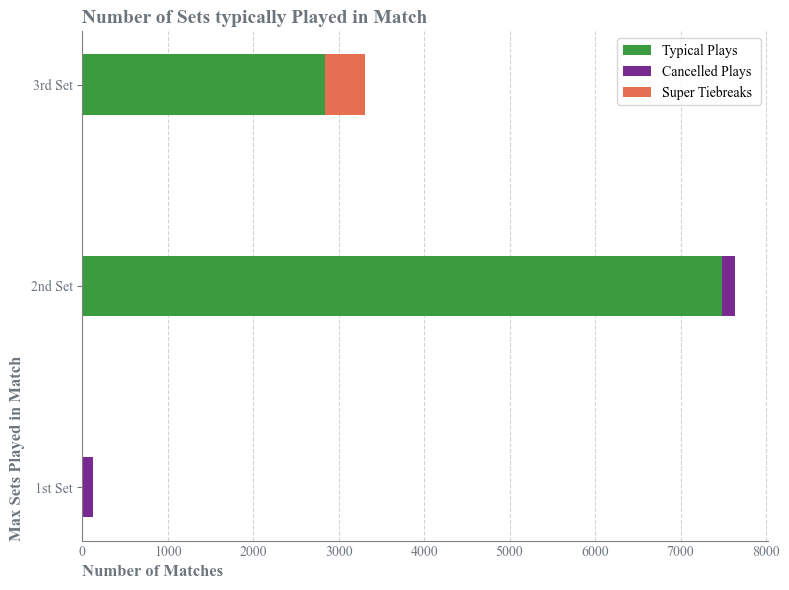

In [114]:
x = np.arange(len(labels))
height = 0.6

fig, ax = plt.subplots(figsize = (8, 6))

ax.barh(x, typical_counts, height = 0.3, label='Typical Plays', color='#3B9C3F')
ax.barh(x, canceled_counts, height = 0.3, left=typical_counts, label='Cancelled Plays', color='#782A90')
ax.barh(x, tiebreak_count, height = 0.3, left=typical_counts, label='Super Tiebreaks ', color='#E76F51')

ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_ylabel('Max Sets Played in Match', loc='bottom', color='#6C757D', weight='bold', fontsize=12)
ax.set_xlabel('Number of Matches', loc='left', color='#6C757D', weight='bold', fontsize=12)
ax.set_title('Number of Sets typically Played in Match', loc='left', color='#6C757D', weight='bold', fontsize=14)
ax.tick_params(axis='x', which='both', length=0)
ax.grid(axis='y', visible=False)
ax.set_yticklabels(['1st Set', '2nd Set', '3rd Set'])
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.legend()
# plt.savefig('D:/Trains/tennis_project/chart/number_of_sets.jpeg', dpi=300)
plt.show();

#### Figure of Super Tiebreak and Cancelled Matches

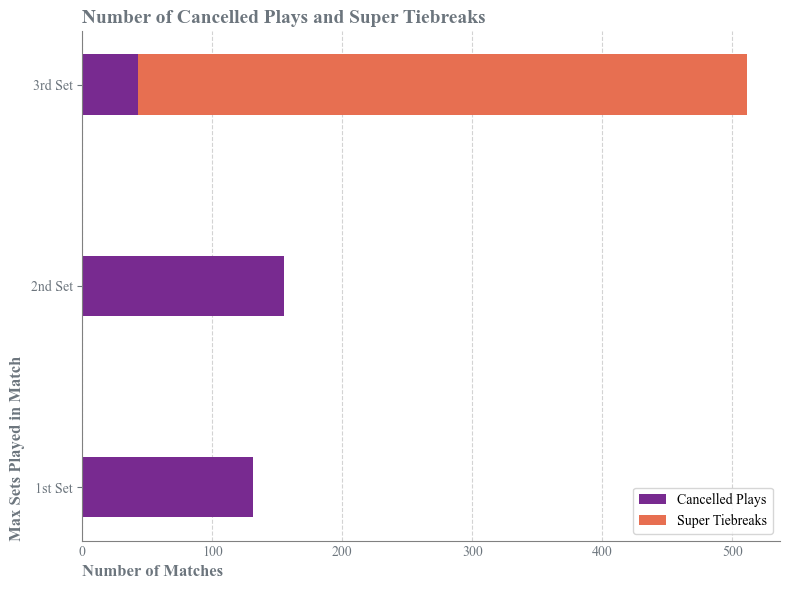

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(x, canceled_counts, height=0.3, label='Cancelled Plays', color='#782A90')
ax.barh(x, tiebreak_count, height=0.3, left=canceled_counts, label='Super Tiebreaks', color='#E76F51')

ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_ylabel('Max Sets Played in Match', loc='bottom', color='#6C757D', weight='bold', fontsize=12)
ax.set_xlabel('Number of Matches', loc='left', color='#6C757D', weight='bold', fontsize=12)
ax.set_title('Number of Cancelled Plays and Super Tiebreaks', loc='left', color='#6C757D', weight='bold', fontsize=14)
ax.tick_params(axis='x', which='both', length=0)
ax.grid(axis='y', visible=False)
ax.set_yticklabels(['1st Set', '2nd Set', '3rd Set'])
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.legend()
# plt.savefig('D:/Trains/tennis_project/chart/cancelled_and_tiebreaks.jpeg', dpi=300)
plt.show()

Out of a total of 11,121 matches played, 468 were decided by a super tiebreak.
Some matches were incomplete due to various reasons, most of which were abandoned during the first set. These accounted for 1% of all matches.
Among the matches that were completed, **67% concluded in the second set, while 30% were played as three-set matches**.

# **6. Most Successful Player Nationality**

#### Count Players of Each Country

In [116]:
#Find unique players and their nationality
unique_players = home_away_team[['fix_full_name', 'country']].drop_duplicates()

In [117]:
avg_rank_per_country = (home_away_team.groupby('country', as_index= False)['current_rank']
                                      .agg(['min', 'max', 'mean'])
                                      .rename(columns = {'min': 'min_rank', 'max': 'max_rank', 'mean': 'average_rank'}))

In [118]:
player_count_per_country = (unique_players.groupby('country', as_index= False)
                            .agg(player_count = ('fix_full_name', 'count'))
                            .sort_values('player_count', ascending =False))
player_count_per_country.head(5)

,country,player_count
93,USA,225
44,Italy,206
31,France,202
78,Russia,137
47,Japan,124


In [119]:
final_player_count = player_count_per_country.merge(avg_rank_per_country, on = 'country', how = 'left')
final_player_count.sort_values('player_count', ascending= False).head(5)

,country,player_count,min_rank,max_rank,average_rank
0,USA,225,3.0,1498.0,536.835762
1,Italy,206,2.0,1578.0,753.391930
2,France,202,14.0,1633.0,617.159564
3,Russia,137,4.0,1635.0,628.203485
4,Japan,124,62.0,1453.0,671.764387


**The United States** with 225 players, had the highest number of participants in these tournaments.

Italy, with 206 players, and France with 202 players, ranked second and third, respectively.

________________________

In [120]:
# event_df.to_csv('D:/Trains/tennis_project/data/output/clean_event.csv', index= False)

In [121]:
# home_away_team.to_csv('D:/Trains/tennis_project/data/output/home_away_team.csv', index= False)